In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Parameters
alpha = 0.1  # Non-linearity coefficient
learning_rate = 0.01
n_units = 5  

# Define the model
model = Sequential([
    Dense(n_units, input_dim=1, activation='relu'),
    Dense(n_units, activation='relu'),
    Dense(1)
])

# Loss function
def custom_loss(y_true, y_pred):
    # Calculate second derivative (central difference)
    d2y_dx2 = (y_pred[:-2] - 2 * y_pred[1:-1] + y_pred[2:]) / 1.0**2
    # Calculate forces based on FPU dynamics
    forces = (y_pred[2:] - 2 * y_pred[1:-1] + y_pred[:-2] + alpha * 
              ((y_pred[2:] - y_pred[1:-1])**2 - (y_pred[1:-1] - y_pred[:-2])**2))
    # Compute the loss
    return tf.reduce_mean((d2y_dx2 - forces) ** 2)

# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate), loss=custom_loss)

# Add data here
import numpy as np
x_train = np.linspace(-2, 2, 1000).reshape(-1, 1)
y_train = np.sin(x_train)  # Placeholder for actual displacement data

# Train the model
model.fit(x_train, y_train, epochs=100, verbose=1)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.9904e-09
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8668e-10
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4175e-11
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8267e-11
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4599e-11
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9570e-11
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6830e-12
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1107e-11
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7654e-12
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2634e-12
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6884e-12
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3697e-12
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7817e-12
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5490e-12
Epoch 15/100
32

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


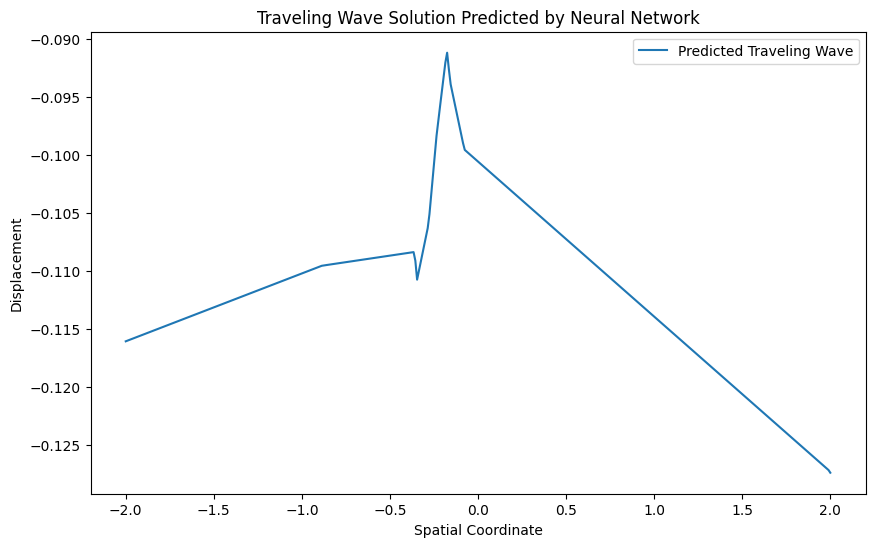

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate predictions
x_values = np.linspace(-10, 10, 400).reshape(-1, 1)
predictions = model.predict(x_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, predictions, label='Predicted Traveling Wave')
plt.xlabel('Spatial Coordinate')
plt.ylabel('Displacement')
plt.title('Traveling Wave Solution Predicted by Neural Network')
plt.legend()
plt.show()
